In [18]:
#Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
# Adjust the path
unicorns_csv_path= '/Users/eleni_icon/Unicorns/2 Data/Prepared data/Cleaned_Unicorns_Data.csv'
data =pd.read_csv(unicorns_csv_path)

In [4]:
# Step 2: Clean data
data['Company Age'] = 2024 - data['Year Joined']  # Create numerical 'Company Age'
numerical_data = data[['Valuation ($B)', 'Company Age']]  # Select numeric columns

# Standardize data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numerical_data)

# Create a DataFrame for standardized data
scaled_df = pd.DataFrame(scaled_data, columns=numerical_data.columns)


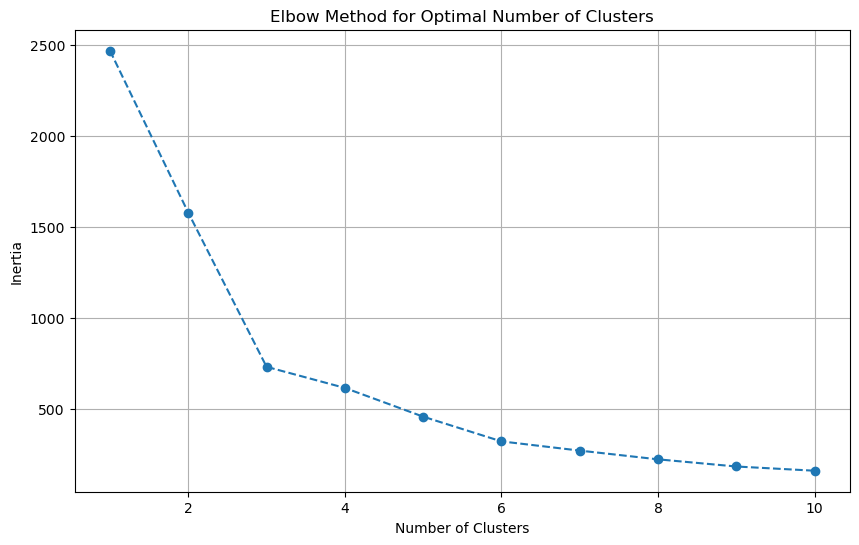

In [5]:
# Step 3: Elbow technique
inertia = []
range_clusters = range(1, 11)

for k in range_clusters:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

# Plot elbow chart
plt.figure(figsize=(10, 6))
plt.plot(range_clusters, inertia, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


#### Why 3 Clusters?
From the elbow chart, the inertia sharply decreases until 3 clusters, after which the improvement slows significantly. This suggests that 3 is an optimal number of clusters.


In [6]:
# Step 5: Run k-means with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_df)


In [7]:
# Step 6: Attach cluster labels
data['Cluster'] = kmeans.labels_


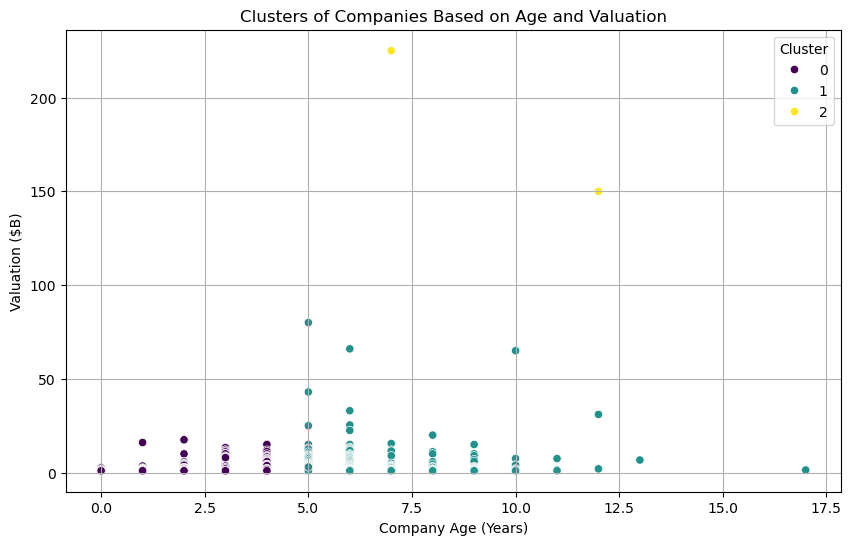

In [8]:
# Step 7: Visualize clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='Company Age', y='Valuation ($B)', hue='Cluster', palette='viridis')
plt.title('Clusters of Companies Based on Age and Valuation')
plt.xlabel('Company Age (Years)')
plt.ylabel('Valuation ($B)')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()


8.Cluster Insights

Cluster 0: Moderate valuations (4.84B) and mid-range company ages (6.6 years). Likely mature companies stabilizing their growth.

Cluster 1: Low valuations (2.21B) and young companies (2.6 years). Represent early-stage unicorns.

Cluster 2: Exceptionally high valuations (187.5B) and slightly older (9.5 years). Likely global leaders like ByteDance or SpaceX.

Do the Clusters Make Sense?
The clusters are logical as they reflect meaningful groupings based on valuation and age. Cluster 2, for example, clearly separates extremely high-valued companies from others.


In [17]:
# Step 9: # Group by clusters to calculate descriptive statistics
cluster_stats = data.groupby('Cluster')[['Valuation ($B)', 'Company Age']].mean()

from IPython.display import display
display(cluster_stats)

,Valuation ($B),Company Age
Cluster,,
0,2.206115,2.626327
1,4.842042,6.588235
2,187.500000,9.500000


Cluster 0: Lower valuations and younger companies.
Cluster 1: Moderate valuations and slightly older companies.
Cluster 2: Exceptionally high valuations with the oldest average company age.


####Future Uses of Clustering Results

1.Investment Strategies: Identify companies in Cluster 1 with potential to grow into Cluster 2.

2.Market Segmentation:Use clusters to create targeted market strategies for unicorn startups.

3.Growth Monitoring:Understand characteristics of high-performing companies to replicate their success.

4.Benchmarking: Compare new unicorns against Cluster 2 companies to set realistic growth goals.

This clustering analysis can serve as a foundation for further predictive modeling, industry comparisons, or decision-making in startup ecosystems.
